# Global temperature

Demo with global land temperature dataset

In [1]:
# !pip install numpy pandas seaborn matplotlib

In [2]:
# https://inclass.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/downloads/GlobalLandTemperaturesByCity.csv
# download and unzip to ./temp/

In [3]:
!ls -lh temp/

total 1173208
-rw-r--r--@ 1 alex  staff   508M May  1  2017 GlobalLandTemperaturesByCity.csv
-rw-r--r--@ 1 alex  staff    22M May  1  2017 GlobalLandTemperaturesByCountry.csv
-rw-r--r--@ 1 alex  staff    13M May  1  2017 GlobalLandTemperaturesByMajorCity.csv
-rw-r--r--@ 1 alex  staff    29M May  1  2017 GlobalLandTemperaturesByState.csv
-rw-r--r--@ 1 alex  staff    41K Aug 17 20:47 GlobalTemp.png
-rw-r--r--@ 1 alex  staff   201K May  1  2017 GlobalTemperatures.csv


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 8
sns.set(context='notebook', rc={'figure.figsize': (8, 5)})
from IPython.display import display

In [5]:
%%time
df = pd.read_csv('temp/GlobalLandTemperaturesByCity.csv', parse_dates=[0],
                 dtype={'Country': 'category', 'City': 'category'})

CPU times: user 12.9 s, sys: 860 ms, total: 13.8 s
Wall time: 14.1 s


In [6]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               datetime64[ns]
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             category
Country                          category
Latitude                         object
Longitude                        object
dtypes: category(2), datetime64[ns](1), float64(2), object(2)
memory usage: 361.0+ MB


In [8]:
from IPython.display import display

def convert_ll(lat, pos_suffix='N', neg_suffix='S'):
    try:
        if lat.endswith(pos_suffix):
            return float(lat[:-1])
        elif lat.endswith(neg_suffix):
            return - float(lat[:-1])
    except (TypeError, ValueError, IndexError):
        return np.NaN

display(convert_ll('1.2N'))
display(convert_ll('3.4S'))
display(convert_ll('5.6E', 'E', 'W'))
display(convert_ll('7.8W', 'E', 'W'))

1.2

-3.4

5.6

-7.8

In [9]:
df['lat'] = df.Latitude.apply(convert_ll)
df['lng'] = df.Longitude.apply(convert_ll, args=('E', 'W'))

In [10]:
del df['Latitude']
del df['Longitude']

In [11]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,lat,lng
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05,10.33
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05,10.33
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05,10.33
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05,10.33
...,...,...,...,...,...,...,...
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24,5.26
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24,5.26
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24,5.26
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24,5.26


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               datetime64[ns]
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             category
Country                          category
lat                              float64
lng                              float64
dtypes: category(2), datetime64[ns](1), float64(4)
memory usage: 361.0 MB


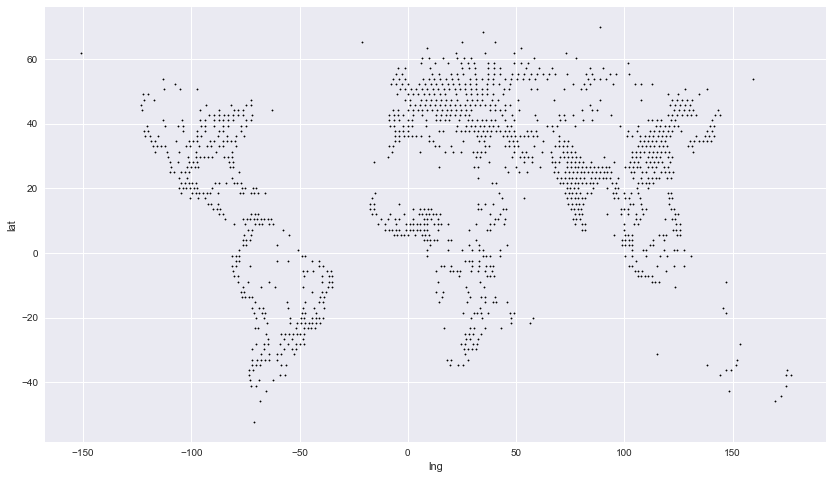

In [13]:
ax = df[['lat', 'lng']].drop_duplicates().plot(kind='scatter', x='lng', y='lat', s=2, figsize=(14, 8), c='k')

In [14]:
df_perth = df[df.City == 'Perth']
df_perth

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,lat,lng
5800918,1852-07-01,15.488,1.395,Perth,Australia,-31.35,114.97
5800919,1852-08-01,14.600,1.095,Perth,Australia,-31.35,114.97
5800920,1852-09-01,15.461,2.034,Perth,Australia,-31.35,114.97
5800921,1852-10-01,15.285,1.461,Perth,Australia,-31.35,114.97
...,...,...,...,...,...,...,...
5802849,2013-06-01,16.991,0.367,Perth,Australia,-31.35,114.97
5802850,2013-07-01,15.866,0.441,Perth,Australia,-31.35,114.97
5802851,2013-08-01,17.304,0.429,Perth,Australia,-31.35,114.97
5802852,2013-09-01,NaN,NaN,Perth,Australia,-31.35,114.97


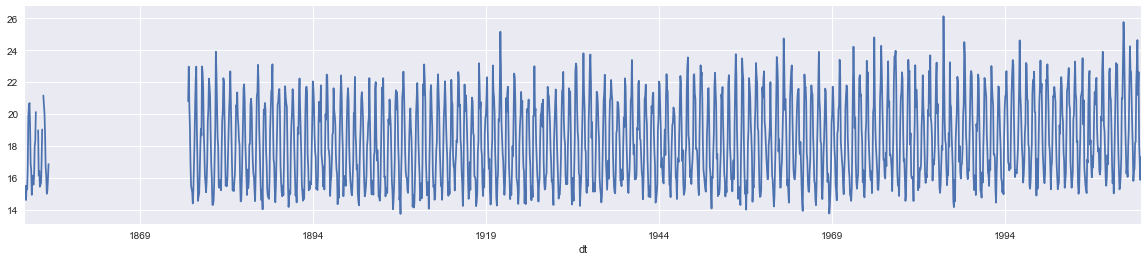

In [15]:
dfpt = df_perth.set_index('dt', drop=True).resample('MS').first()
ax = dfpt.AverageTemperature.plot(figsize=(20, 4))

In [16]:
r = dfpt.resample('AS')
r_temp = r[['AverageTemperature']].agg([np.mean, np.max, np.min, np.ptp])
r_uncert = r[['AverageTemperatureUncertainty']].mean()
df_per_annual = pd.concat([r_temp, r_uncert], axis=1)
df_per_annual

,"(AverageTemperature, mean)","(AverageTemperature, amax)","(AverageTemperature, amin)","(AverageTemperature, ptp)",AverageTemperatureUncertainty
dt,,,,,
1852-01-01,16.210333,19.790,14.600,5.190,1.499500
1853-01-01,17.380000,20.688,14.923,5.765,1.992500
1854-01-01,17.148111,20.120,15.431,4.689,1.944778
1855-01-01,17.630400,21.156,14.990,6.166,1.544900
...,...,...,...,...,...
2010-01-01,19.085417,23.199,15.269,7.930,0.387250
2011-01-01,19.986000,25.768,16.049,9.719,0.389500
2012-01-01,19.552250,24.249,15.797,8.452,0.375083
2013-01-01,19.975625,24.640,15.866,8.774,0.354750


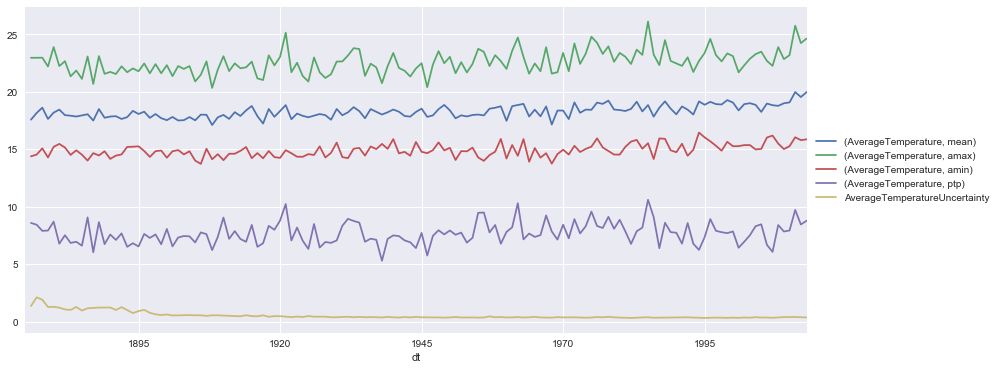

In [17]:
df_per_annual['1875':].plot(figsize=(14, 6))
_ = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

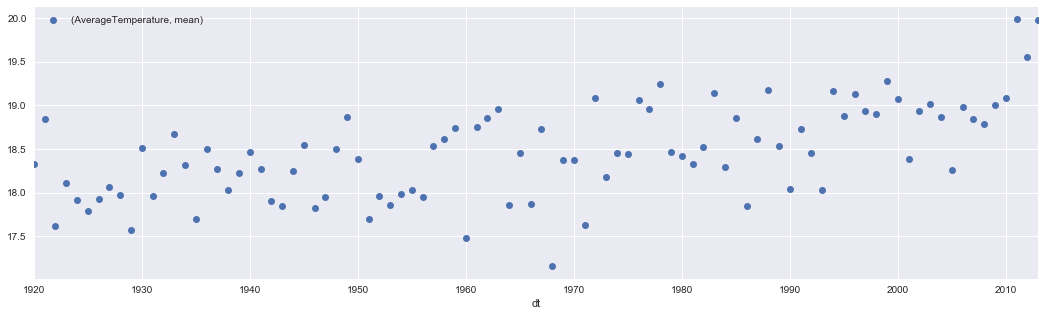

In [18]:
_ = df_per_annual['1920':][[('AverageTemperature', 'mean')]].plot(style='o', figsize=(18, 5))

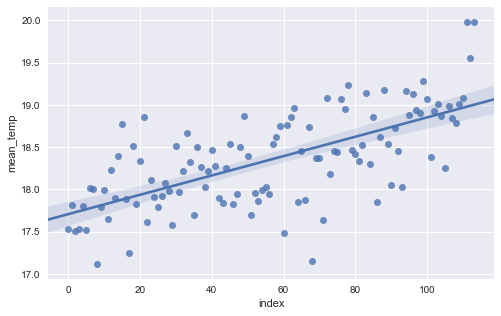

In [19]:
df_clean = df_per_annual['1900':].rename(columns={('AverageTemperature', 'mean'): 'mean_temp'})
df_clean = df_clean[['mean_temp']].reset_index(drop=True) # create numeric index
df_clean = df_clean.reset_index()

ax = sns.regplot(x='index', y='mean_temp', data=df_clean)

In [20]:
df_cities = df.dropna().groupby('City').last()
df_cities

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,lat,lng
City,,,,,,
A Coruña,2013-08-01,20.348,0.516,Spain,42.59,-8.73
Aachen,2013-08-01,18.098,0.338,Germany,50.63,6.34
Aalborg,2013-08-01,17.423,0.408,Denmark,57.05,10.33
Aba,2013-08-01,25.587,0.412,Nigeria,5.63,8.07
...,...,...,...,...,...,...
Çorlu,2013-08-01,25.246,0.375,Turkey,40.99,27.69
Çorum,2013-08-01,21.452,0.344,Turkey,40.99,34.08
Öskemen,2013-08-01,16.859,0.785,Kazakhstan,50.63,82.39
Ürümqi,2013-08-01,22.974,0.597,China,44.20,87.20


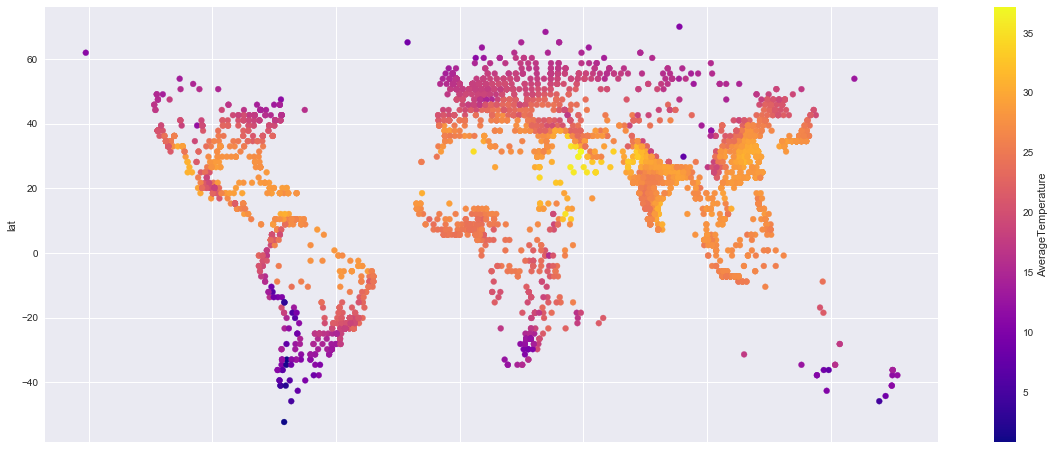

In [21]:
ax = df_cities.plot.scatter(x='lng', y='lat', c='AverageTemperature', cmap='plasma', s=35, figsize=(20, 8))